# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from platform import python_version
print(python_version())

3.7.4


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils import predict_nn, display_data, sigmoid, gradient_nn, check_nn_gradients
from utils import sigmoid_gradient, cost_function_nn, rand_initialize_weights, train

# Load Training Data

In [19]:
data = loadmat("data/ex4data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [20]:
X = data['X']
m, n = X.shape
print(f"We have {m} hand written digits examples")
y = data['y']

We have 5000 hand written digits examples


# Visualize Randomly Selected Data

In [21]:
# Randomly select data points to display
m, n = X.shape
indices = np.random.permutation(m)
data_points = X[indices[0:100], :]

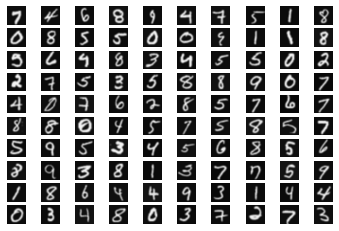

In [22]:
for i, da in enumerate(data_points):
    sp = plt.subplot(10, 10, i+1, facecolor='red')
    sp.axis('Off')
    data_points_ = np.reshape(da, (20,20), order='F')
    plt.imshow(data_points_, cmap='gray', interpolation = 'bicubic')

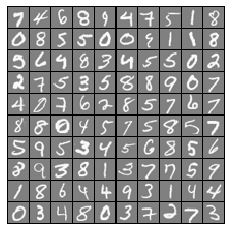

In [23]:
display_data(data_points)

# Load pre-trained parameters

In [24]:
weights = loadmat("data/ex4weights.mat")
theta1 = weights['Theta1']
print(f'theta1 shape: {theta1.shape}')
theta2 = weights['Theta2']
print(f'theta2 shape: {theta2.shape}')

# Unroll parameters
theta1 = np.reshape(theta1, (-1, 1), order='F')
theta2 = np.reshape(theta2, (-1, 1), order='F')
params = np.vstack((theta1, theta2))
params.shape

theta1 shape: (25, 401)
theta2 shape: (10, 26)


(10285, 1)

# Train the Neural Network

## Compute Cost (Feedforward)

In [25]:
lambd = 3
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [26]:
J = cost_function_nn(params, X, y, input_layer_size, hidden_layer_size, num_labels, lambd)

In [27]:
J

0.5760512469501331

## Initializing Parameters

In [28]:
# randomly initialize weights
initial_theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
initial_theta2 = rand_initialize_weights(hidden_layer_size, num_labels)

In [29]:
initial_theta2.shape

(10, 26)

In [30]:
initial_theta1_unrolled = initial_theta1.flatten(order='F').reshape(-1, 1)
initial_theta2_unrolled = initial_theta2.flatten(order='F').reshape(-1, 1)
initial_nn_params = np.vstack((initial_theta1_unrolled, initial_theta2_unrolled))

## Check Backpropagation Implementation

In [31]:
check_nn_gradients()

[[-9.27825235e-03 -9.27825236e-03]
 [ 8.89911959e-03  8.89911960e-03]
 [-8.36010761e-03 -8.36010762e-03]
 [ 7.62813551e-03  7.62813551e-03]
 [-6.74798370e-03 -6.74798370e-03]
 [-3.04978931e-06 -3.04978914e-06]
 [ 1.42869450e-05  1.42869443e-05]
 [-2.59383093e-05 -2.59383100e-05]
 [ 3.69883213e-05  3.69883234e-05]
 [-4.68759787e-05 -4.68759769e-05]
 [-1.75060082e-04 -1.75060082e-04]
 [ 2.33146356e-04  2.33146357e-04]
 [-2.87468727e-04 -2.87468729e-04]
 [ 3.35320349e-04  3.35320347e-04]
 [-3.76215585e-04 -3.76215587e-04]
 [-9.62660618e-05 -9.62660620e-05]
 [ 1.17982668e-04  1.17982666e-04]
 [-1.37149707e-04 -1.37149706e-04]
 [ 1.53247079e-04  1.53247082e-04]
 [-1.66560292e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 9.74006970e-02  9.74006970e-02]
 [ 1.64090819e-01  1.64090819e-01]
 [ 5.75736493e-02  5.75736493e-02]
 [ 5.04575855e-02  5.04575855e-02]
 [ 1.64567932e-01  1.64567932e-01]
 [ 5.77867379e-02  5.77867378e-02]
 [ 5.07530173e-02  5

In [32]:
check_nn_gradients(lambd=3)

[[-9.27825235e-03 -9.27825236e-03]
 [ 8.89911959e-03  8.89911960e-03]
 [-8.36010761e-03 -8.36010762e-03]
 [ 7.62813551e-03  7.62813551e-03]
 [-6.74798370e-03 -6.74798370e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [ 3.94334829e-02  3.94334829e-02]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.47640974e-02  2.47640974e-02]
 [-3.26881426e-02 -3.26881426e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [ 5.46101548e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 9.74006970e-02  9.74006970e-02]
 [ 1.18682669e-01  1.18682669e-01]
 [ 3.81928666e-05  3.81928696e-05]
 [ 3.36926556e-02  3.36926556e-02]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.17148233e-01  1.17148233e-01]
 [ 7.54801264e-02  7

## Training Neural Network

In [22]:
lambd = 1
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [35]:
options = {'maxiter': 400, 'disp': True}
nn_params = train(X, y, initial_nn_params, input_layer_size, hidden_layer_size, num_labels, options, lambd)

It took 682.13 seconds to train the Network


In [36]:
nn_params = np.reshape(nn_params, (-1, 1), order='F')
nn_params.shape

(10285, 1)

In [37]:
# Reshape nn_params into theta1 and theta2
Theta1 = np.reshape(nn_params[0: hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, input_layer_size + 1), order='F')
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                    (num_labels, hidden_layer_size + 1), order='F')

In [38]:
print('Theta1 shape: ', Theta1.shape)
print('Theta2 shape: ', Theta2.shape)

Theta1 shape:  (25, 401)
Theta2 shape:  (10, 26)


# Visualize Weights

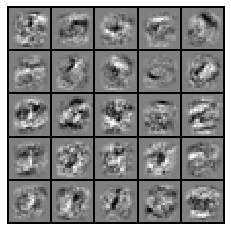

In [39]:
data_points = Theta1[:, 1:]
display_data(data_points)

# Predict using the Trained Model

In [40]:
pred = predict_nn(Theta1, Theta2, X)

print(f'Train Accuracy: {np.mean(pred == y) * 100:.2f}%')

Train Accuracy: 97.62%
